<a href="https://colab.research.google.com/github/AgustinGurvich/TMD/blob/main/TMD_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo Práctico 1

Importamos librerias a utilizar

In [29]:
library(MASS)
library(ggplot2)
library(tidyverse)
library(rpart)

Funcion que genera un conjunto de datos tipo diagonal

In [30]:
diagonal <- function(n,d,C){
std_dev <- C * sqrt(d) 
covariance_matrix = diag(std_dev, d, d)
centerClass1 = rep(1, times=d)
centerClass0 = rep(-1, times=d)
size1 = floor(n/2)
size0 = ceiling(n/2)
points1 <- mvrnorm(size1, centerClass1, covariance_matrix)
points0 <- mvrnorm(size0, centerClass0, covariance_matrix)
class1 <- cbind(points1, rep(1, times=d))
class0 <- cbind(points0, rep(0, times=d))
columnNames <- c(paste0("d", seq(1,d)),"class")
f <- as.data.frame(rbind(class0,class1))
colnames(f) <- columnNames
return (f)
}

Generamos los datos diagonales necesarios

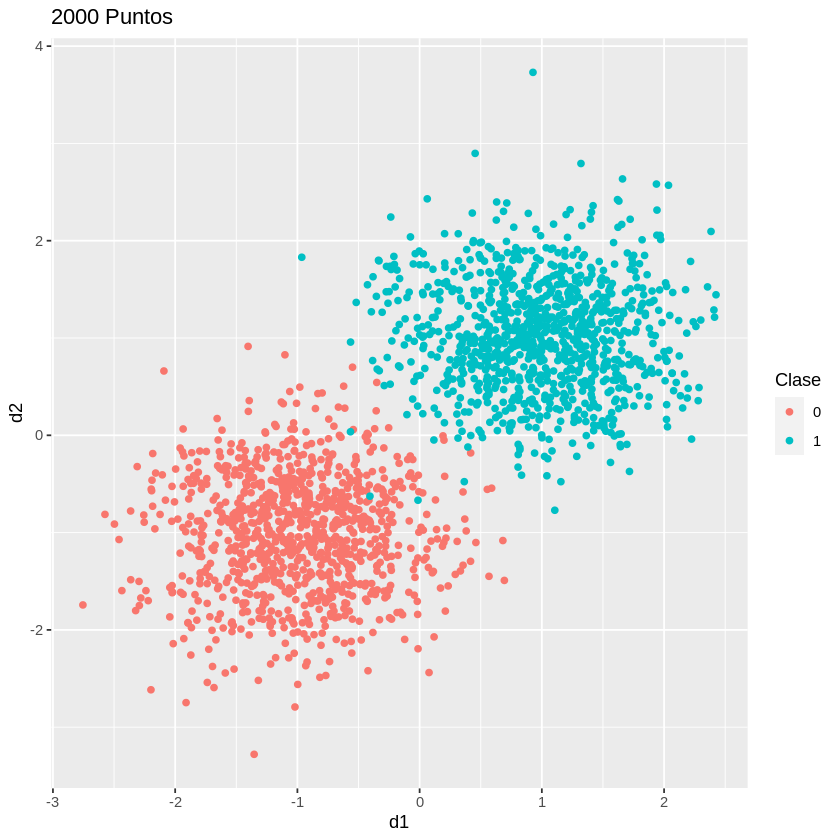

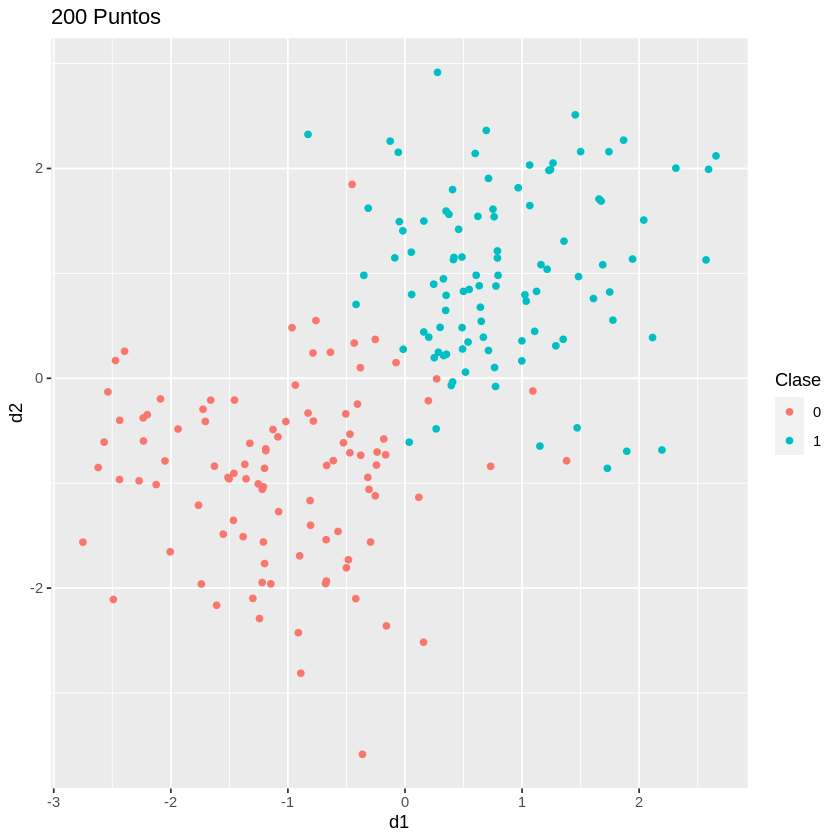

In [39]:
diagTest <- diagonal(2000,2,0.25)
diagTest$class <- as.factor(diagTest$class)
ggplot(diagTest, 
       aes(x=d1, 
           y=d2,
           color = factor(class))) +
  geom_point() + 
  labs(title = "2000 Puntos", colour  = "Clase")

diagTrain <- diagonal(200,2,0.5)
diagTrain$class <- as.factor(diagTrain$class)
ggplot(diagTrain, 
       aes(x=d1, 
           y=d2,
           color = factor(class))) +
  geom_point() + 
  labs(title = "200 Puntos", colour  = "Clase")

Clasificando el conjunto de datos diagonal utilizando árboles de decisión y un test simple



In [32]:
arbolDiag <- rpart(formula = class ~ ., data = diagTrain)
predictDiagSimple <- predict(arbolDiag, newdata=diagTest[-3], type = "class")
confusionMatrix(predictDiagSimple, diagTest[,3])

ERROR: ignored

Clasificando el conjunto de datos diagonal utilizando árboles de decisión y 5-fold cross-validation


In [40]:
#sample(n), si n es un numero natural y no se especifica el tamanio, genera una permutacion de los numeros entre 1 y n
#En este caso, es el conjunto de test pero mezclado aleatoriamente
pepe<-diagTrain[sample(nrow(diagTrain)),]

# #Create k equally size folds
pepeF <- cut(seq(1,nrow(pepe)),breaks=5,labels=FALSE)

# #Perform 10 fold cross validation
for(i in 1:5){
    #Segement your data by fold using the which() function 
    testIndexes <- which(pepeF==i,arr.ind=TRUE)
    testData <- diagTrain[testIndexes, ]
    trainData <- diagTrain[-testIndexes, ]
}
print(testData)


             d1         d2 class
161  0.16092123  1.4984596     1
162  0.05674573  0.7987379     1
163  0.76161244  1.5395870     1
164  0.69447936  2.3620385     1
165  0.60808549  0.9817348     1
166  0.34758501  0.6466165     1
167  1.61016222  0.7602841     1
168 -0.04856690  1.4931941     1
169  1.86729384  2.2696402     1
170  1.35147625  0.3713991     1
171  1.06492960  2.0324134     1
172  1.06641113  1.6461940     1
173  1.22934076  1.9814338     1
174  0.66929988  0.3917624     1
175  0.99858061  0.3567562     1
176  0.65137239  0.5431406     1
177  0.79487462  0.9813995     1
178  1.72897345 -0.8585132     1
179  1.15249115 -0.6462708     1
180  0.45819227  1.4200740     1
181  1.65741588  1.7085793     1
182 -0.31411633  1.6212051     1
183  0.35415029  0.2291884     1
184  0.54849870  0.8469176     1
185  0.20316438  0.3919353     1
186  0.05429735  1.2018158     1
187  1.16151397  1.0829716     1
188  0.78935585  1.2142612     1
189  0.35153155  0.7906725     1
190  0.375

In [46]:
# folds <- createFolds(t(diagTrain[, "class"]), k = 5)
# diagTestFolds <- diagTrain[folds[[1]], ]
# diagTrainFolds <- diagTrain[setdiff(seq(1:dim(diagTrain)[1]), folds[[1]]), ]
arbolDiagFolds <- rpart(formula = class ~ ., data = trainData)
predictDiagFolds <- predict(arbolDiagFolds, newdata=testData[-3], type = "class")
table(predictDiagFolds, testData[,3])
# confusionMatrix(predictDiagFolds, testData[,3])

                
predictDiagFolds  0  1
               0  0  5
               1  0 35

Funcion que genera un conjunto de datos tipo espiral

In [ ]:
f1 <- function(theta){
  return (theta/(4*pi))
}

f2 <- function(theta){
  return ((theta + pi)/ (4*pi))
}

espiral <- function(n){
  #Buscamos generar n puntos: la mitad de cada clase
  size0 <- floor(n/2)
  size1 <- ceiling(n/2)

  #¿Cuantos de cada clase generamos?
  acumClass0 <- 0
  acumClass1 <- 0

  #Dataframe a crear
  points <- data.frame()

  #Valor 2 * pi
  pi2 <- 2 * pi  

  #Empezamos a generar puntos hasta llenar las clases
  while(acumClass0 < size0 || acumClass1 < size1){
    #Armamos un punto en coordenadas polares
    r <- sqrt(runif(1,0,1))
    theta <-  pi2 * runif(1,0,1)

    #Usamos estos valores para recorres las curvas y revisar que el punto se 
    #encuentre entre ellas
    circleLoops <- seq(-1,5,1)
    circleLoops <- (circleLoops * pi2) + theta
    #Para guardar a que clase pertenece
    between = F

    for(loop in circleLoops){
      if(f1(loop) < r && r < f2(loop)){ #Esta comprendido entre curvas
        if(acumClass0 < size0){ #¿Lo tengo que almacenar?
          x <- r * cos(theta)
          y <- r * sin(theta)
          acumClass0 <- acumClass0 + 1
          points <- rbind(points, c(x,y,0))
        }
        between = T
      }
    }

    #Si no estaba entre las curvas, entonces es de la clase 1
    if(acumClass1 < size1 && !between){
      x <- r * cos(theta)
      y <- r * sin(theta)
      acumClass1 <- acumClass1 + 1
      points <- rbind(points, c(x,y,1))
    }
    
  }

  colnames(points) <- c("x", "y", "class")

  return (points)
}

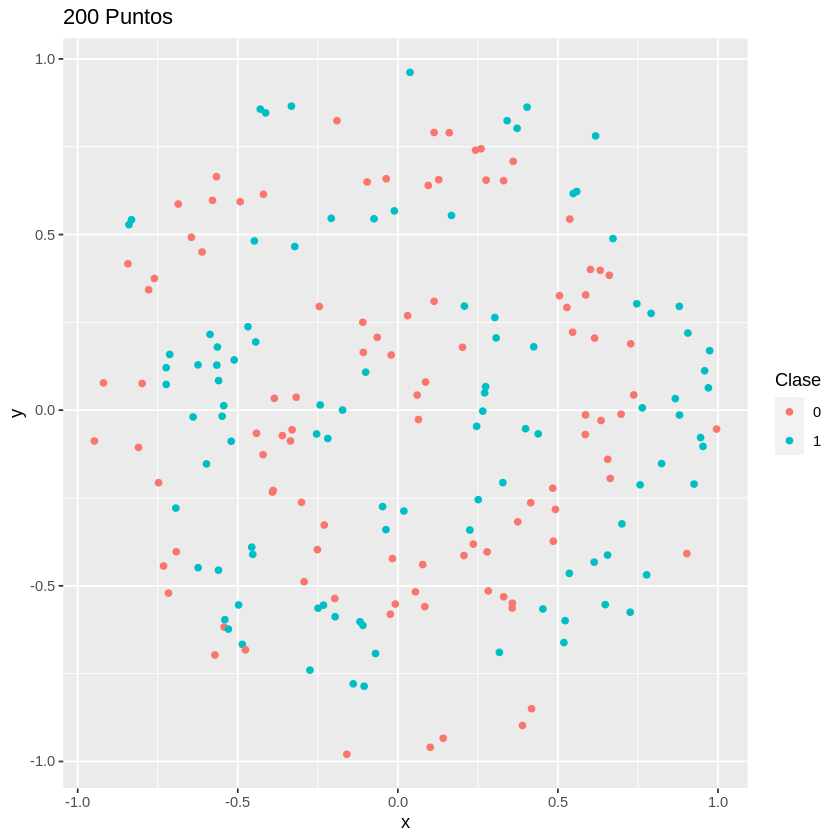

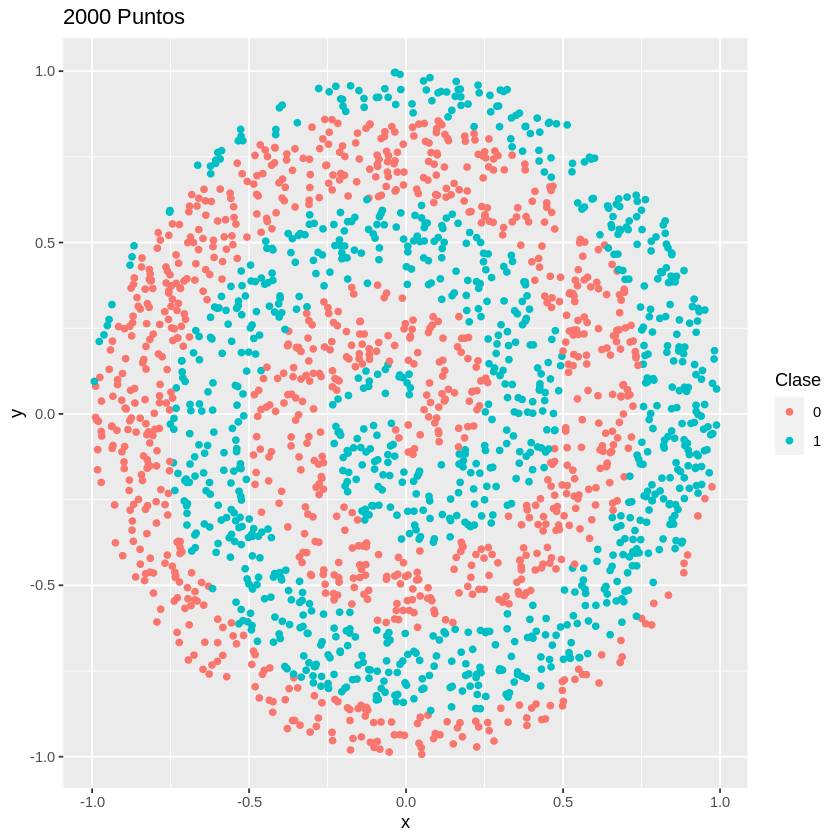

In [ ]:
spiralPoints200 <- espiral(200)
ggplot(spiralPoints200, 
       aes(x=x, 
           y=y, 
           color = factor(class))) +
  geom_point() + 
  labs(title = "200 Puntos", colour  = "Clase") 

spiralPoints2000 <- espiral(2000)
ggplot(spiralPoints2000, 
       aes(x=x, 
           y=y, 
           color = factor(class))) +
  geom_point() + 
  labs(title = "2000 Puntos", colour  = "Clase") 